In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def true_positive_rate(preds, targets):

    idx = np.argsort(-np.array(preds))
    sorted_targets = np.array(targets)[idx]
    TPR = np.cumsum(sorted_targets == 1) / np.sum(np.array(targets) == 1)
    return TPR

def false_positive_rate(preds, targets):
    idx = np.argsort(-np.array(preds))
    sorted_targets = np.array(targets)[idx]
    FPR = np.cumsum(sorted_targets != 1) / np.sum(np.array(targets) != 1)
    return FPR

In [3]:
def compute_auc(TPR, FPR):
    #Computes AUROC using the midpoint rule. i.e. splitting the area into rectangles.
    areas = [(FPR[i+1] - FPR[i])*TPR[i] for i in range(len(TPR)-1)]
    auc = np.sum(areas)
    return auc

In [4]:
scores = np.array([4.57524170e+00,  5.64951861e+00,  3.10576596e+00,  3.87349940e+00,
  4.41223054e+00,  6.74114767e+00, -1.35732042e+00,  3.73641706e+00,
  7.07532445e+00, -1.57835347e+00,  1.91586018e+00,  4.70154031e+00,
  7.02626413e+00,  4.04941505e+00,  4.72519379e+00, -3.50624938e+00,
 -6.24414129e+00, -1.06394971e+01, -1.05745169e+01, -1.03824937e+01,
  4.36337785e-01, -3.53414021e+00, -5.27779989e-01, -3.08817458e+00,
 -9.58749340e+00, -2.28411362e+00, -3.48618478e+00, -9.96579641e+00,
 -7.67909528e-01,  6.47249391e-04,])

targets = np.array([ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1,
 -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
mid_preds = np.sign(scores)

In [15]:
def compute_average_tpr_fpr(scores, y_test):
    #Computes the average TPR for each FPR instance given scores and targets (y_test)

    TPR = true_positive_rate(scores, y_test)
    FPR = false_positive_rate(scores, y_test)

    new_TPR = []
    unique_fprs = np.unique(FPR)

    for ufp in unique_fprs:
        #print(TPR[ufp == FPR], '\n')
        new_TPR.append(np.mean(TPR[ufp == FPR]))
    
    return unique_fprs, new_TPR

In [42]:
def compute_tpr_fpr_range(scores_list, y_test, low_quantile, high_quantile):
    #Accepts scores_list which is mulitple instances of scores returned by a model
    scores = scores_list.flatten()
    targets = y_test.flatten()

    TPRs = true_positive_rate(scores, targets)
    FPRs = false_positive_rate(scores, targets)
    
    tpr_mid = []
    tpr_high = []
    tpr_low = []
    unique_fpr = np.unique(FPRs)

    for ufp in unique_fpr:
        tpr_distr = sorted(TPRs[FPRs == ufp])
        tpr_mid.append(np.median(tpr_distr))
        tpr_low.append(tpr_distr[int(len(tpr_distr) * low_quantile)])
        tpr_high.append(tpr_distr[int(len(tpr_distr) * high_quantile)])

    return tpr_low, tpr_high, tpr_mid, unique_fpr        


In [49]:
def plot_roc(tpr_low, tpr_high, tpr_mid, fpr, compute_auc_func):
    auc = compute_auc_func(tpr_mid, fpr)
    
    plt.figure(figsize = (4, 4))
    
    plt.plot(fpr, tpr_mid, color = 'black', linewidth = 1, zorder = 2)
    plt.scatter(fpr, tpr_mid, color = 'black', marker = 'o', s = 15, zorder = 3)
    plt.fill_between(fpr, tpr_low, tpr_high, color = '#C0C0C0', zorder = 0)

    plt.grid(visible = True)
    plt.title(f'AUC ROC:{round(auc, 2)}')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    

In [44]:
tpr_low, tpr_high, tpr_mid, fpr = compute_tpr_fpr_range(scores, targets, 0.05, 0.95)

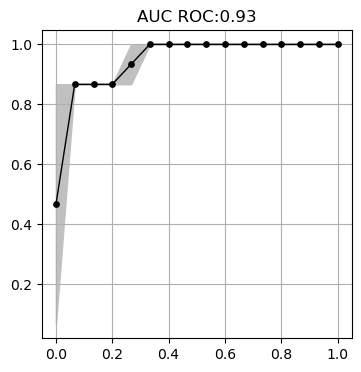

In [48]:
plot_roc(tpr_low, tpr_high, tpr_mid, fpr, compute_auc)